**Importando os dados de uma API**

In [83]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [85]:
df = requests.get(url).json()
dados = pd.json_normalize(df, sep='_')


**Limpeza e Tratamnento de dados**

In [86]:
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [87]:
dados.shape


(7267, 21)

In [88]:
dados.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [89]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [90]:
dados.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [91]:
dados.duplicated().sum()

np.int64(0)

**Análise Exploratória dos Dados**

In [99]:
dados['Contas_Diarias'] = dados['account_Charges_Monthly'] / 30

In [93]:
dados[['account_Charges_Monthly', 'Contas_Diarias']].head()

,account_Charges_Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [94]:
colunas_numericas = dados.select_dtypes(include='number').columns

In [95]:
dados[colunas_numericas].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
customer_tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
account_Charges_Monthly,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
Contas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


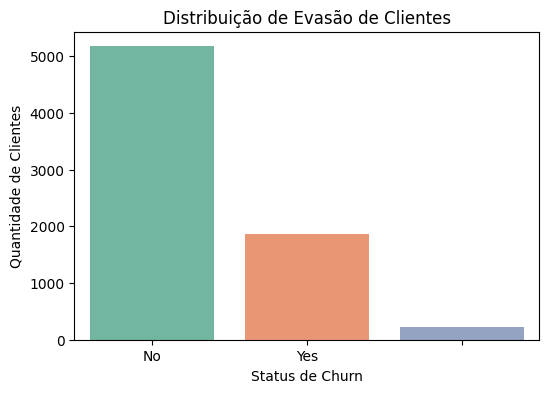

In [96]:
plt.figure(figsize=(6,4))
sns.countplot(data=dados, x='Churn', palette='Set2')
plt.title('Distribuição de Evasão de Clientes')
plt.xlabel('Status de Churn')
plt.ylabel('Quantidade de Clientes')
plt.show()

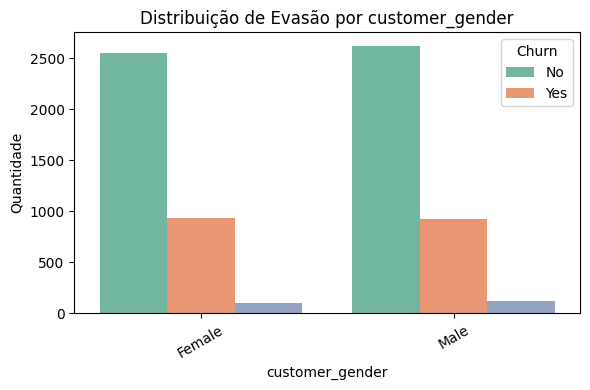

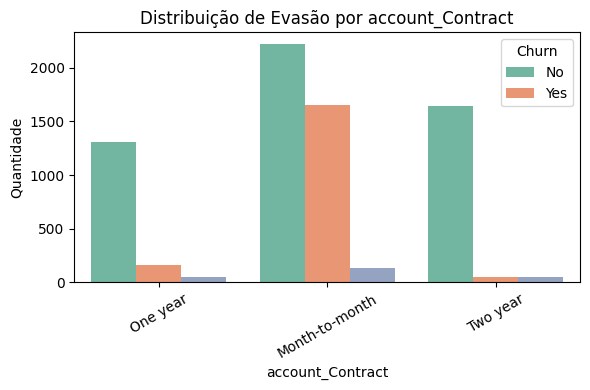

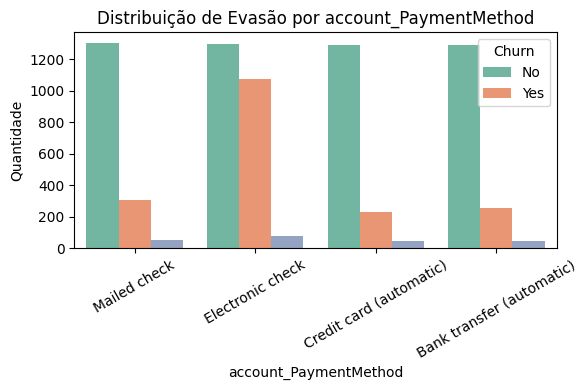

In [97]:
categorias = ['customer_gender', 'account_Contract', 'account_PaymentMethod']
for col in categorias:
    plt.figure(figsize=(6,4))
    sns.countplot(data=dados, x=col, hue='Churn', palette='Set2')
    plt.title(f'Distribuição de Evasão por {col}')
    plt.xticks(rotation=30)
    plt.ylabel('Quantidade')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

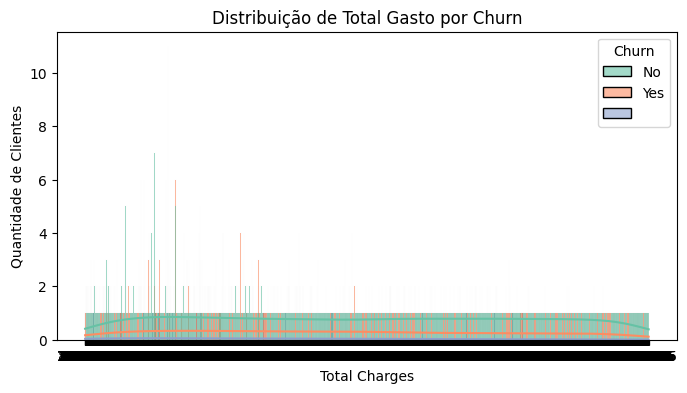

In [98]:
plt.figure(figsize=(8,4))
sns.histplot(data=dados, x='account_Charges_Total', hue='Churn', bins=30, kde=True, palette='Set2', alpha=0.6)
plt.title('Distribuição de Total Gasto por Churn')
plt.xlabel('Total Charges')
plt.ylabel('Quantidade de Clientes')
plt.show()

**Relatório**

**1. Introdução**
A evasão de clientes (churn) é um dos maiores desafios das operadoras de telecomunicações. Com concorrência acirrada, identificar quais fatores levam um cliente a cancelar o serviço é crucial para embasar estratégias de retenção.
Neste notebook, nosso objetivo foi:
- Carregar e tratar a base da Telecom X
- Examinar qualidade dos dados
- Explorar padrões de churn em variáveis categóricas e numéricas
- Gerar insights e recomendações para reduzir a evasão

**2. Limpeza e Tratamento de dados**
Foram utlizados as bliblotecas pandas, requests, seaborn, e matplotlib para manipulação de dados.
Assim sendo, foram verificados o tamanho dos dados linhas e colunas (shape); valores nulos em cada coluna (isnull().sum()); bem como, se há dados duplicados (duplicated().sum()).

**3. Análise Exploratória de Dados**
Para aprofundar a compreensão dos hábitos de consumo dos clientes, foi criada a variável Contas_Diarias, calculada a partir do valor mensal (account_Charges_Monthly) dividido por 30. Essa transformação permitiu observar os gastos médios diários dos clientes e facilitou comparações entre perfis com maior ou menor propensão à evasão.
Além disso, foram aplicadas diversas análises com foco nas variáveis numéricas e categóricas:
- Avaliação de distribuições estatísticas (média, mediana, desvio padrão)
- Visualizações como boxplots e histogramas cruzando Churn com tenure, TotalCharges e outras métricas
- Análises categóricas com contagem e proporção por Contract, PaymentMethod, InternetService, entre outras
Essas análises foram fundamentais para identificar padrões de evasão e levantar hipóteses sobre o comportamento do cliente.


**4. Conclusões e Insights**
- A fidelidade (tempo de contrato) está positivamente correlacionada com a retenção.
- Clientes com contrato mensal representam o grupo de maior risco.
- Os que utilizam pagamento automático demonstram maior permanência.
- Menor valor de faturamento total está associado ao grupo com maior churn.
Esses achados apontam para perfis de risco claros e oferecem base para ações preventivas.

**5. Recomendações**
Com base nas análises realizadas, propomos as seguintes ações estratégicas:
- Oferecer incentivos para migração para contratos anuais (ex: desconto, bônus em serviços).
- Estimular o uso de pagamento automático, com benefícios vinculados.
- Criar alertas para clientes com pouco tempo de contrato e baixo faturamento, sinalizando risco de evasão.
- Investir em serviços adicionais que reforcem a permanência, como suporte técnico premium ou pacotes de entretenimento.
- Utilizar esse conhecimento em modelos preditivos de churn, ampliando a capacidade de ação proativa.
